# Иерархическая кластеризация

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\sh_ART\Data\wine-clustering.csv')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
cluster_num=3
K_means = KMeans(n_clusters = 3,
                 max_iter = 300,
                random_state = 1)
y_kmeans = K_means.fit_predict(df)

In [4]:
y_kmeans

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1])

In [5]:
df["clus_km"]=y_kmeans
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,clus_km
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(df['clus_km'])
df['clus_km'] = label_encoder.transform(df['clus_km'])

In [7]:
X = df.iloc[:, [1, 2, 3, 4]].values
X

array([[  1.71,   2.43,  15.6 , 127.  ],
       [  1.78,   2.14,  11.2 , 100.  ],
       [  2.36,   2.67,  18.6 , 101.  ],
       [  1.95,   2.5 ,  16.8 , 113.  ],
       [  2.59,   2.87,  21.  , 118.  ],
       [  1.76,   2.45,  15.2 , 112.  ],
       [  1.87,   2.45,  14.6 ,  96.  ],
       [  2.15,   2.61,  17.6 , 121.  ],
       [  1.64,   2.17,  14.  ,  97.  ],
       [  1.35,   2.27,  16.  ,  98.  ],
       [  2.16,   2.3 ,  18.  , 105.  ],
       [  1.48,   2.32,  16.8 ,  95.  ],
       [  1.73,   2.41,  16.  ,  89.  ],
       [  1.73,   2.39,  11.4 ,  91.  ],
       [  1.87,   2.38,  12.  , 102.  ],
       [  1.81,   2.7 ,  17.2 , 112.  ],
       [  1.92,   2.72,  20.  , 120.  ],
       [  1.57,   2.62,  20.  , 115.  ],
       [  1.59,   2.48,  16.5 , 108.  ],
       [  3.1 ,   2.56,  15.2 , 116.  ],
       [  1.63,   2.28,  16.  , 126.  ],
       [  3.8 ,   2.65,  18.6 , 102.  ],
       [  1.86,   2.36,  16.6 , 101.  ],
       [  1.6 ,   2.52,  17.8 ,  95.  ],
       [  1.81, 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  clus_km               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [9]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,clus_km
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.084270
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.780178
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [10]:
df.clus_km.unique()

array([0, 2, 1], dtype=int64)

In [11]:
df.clus_km.value_counts()

clus_km
1    69
2    62
0    47
Name: count, dtype: int64

In [12]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
clus_km                 0
dtype: int64

# Метод локтя

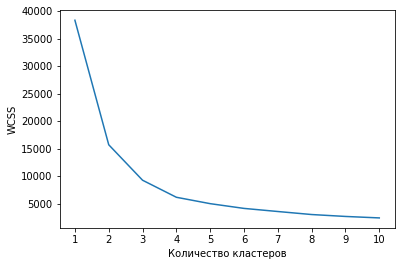

In [13]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel("Количество кластеров")
plt.ylabel("WCSS")
plt.show()

График имеет форму локтя "локтя" или "сгиба".При увеличении числа кластеров SSE будет уменьшаться, но с увеличением числа кластеров улучшение будет уменьшаться постепенно. Оптимальное число кластеров выбирается в точке, где изменение SSE становится менее значительным (точка сгиба на графике).

# Кросс-валидация

Определение оптимального количества кластеров с помощью кросс-валидации является одним из методов выбора подходящего числа кластеров в алгоритмах кластеризации. В этом случае кросс-валидация используется для оценки качества кластеризации при разных значениях числа кластеров и выбора значения, которое демонстрирует наилучшую производительность.

In [14]:
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score

# Create a range of cluster numbers to evaluate
cluster_range = range(2, 11)

# Initialize a list to store the cross-validated scores
cv_scores = []

for k in cluster_range:
    # Create a KMeans instance with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Perform cross-validation and compute the mean score
    cv_score = cross_val_score(kmeans, X, cv=5).mean()
    cv_scores.append(cv_score)

# Find the index of the maximum cross-validated score
best_cv_index = np.argmax(cv_scores)

# Print the results
print("Cross-Validated Scores:", cv_scores)
print("Best Number of Clusters based on Cross-Validated Score:", cluster_range[best_cv_index])

Cross-Validated Scores: [-3530.5253304607095, -2255.2671457130737, -1682.7533809671154, -1404.0834595923302, -1160.4613772721884, -1063.6678486296141, -925.859681476311, -811.6423878713405, -770.5851909001333]
Best Number of Clusters based on Cross-Validated Score: 10


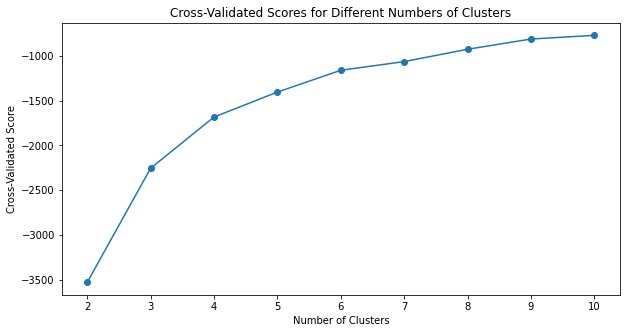

In [15]:
import matplotlib.pyplot as plt

# Plot cross-validated scores
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, cv_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Cross-Validated Score')
plt.title('Cross-Validated Scores for Different Numbers of Clusters')
plt.show()

Важно отметить, что выбор оптимального количества кластеров с помощью кросс-валидации является эвристическим методом и зависит от выбранных метрик и данных. Результаты могут варьироваться в зависимости от конкретной задачи и особенностей данных. Поэтому рекомендуется проводить дополнительный анализ и проверять стабильность результатов при выборе оптимального количества кластеров.

# Силуэтный коэффициент

Силуэтный коэффициент (Silhouette coefficient) - это метрика, используемая для оценки качества кластеризации данных. Он измеряет, насколько объекты внутри одного кластера похожи друг на друга по сравнению с объектами из других кластеров. Более высокое значение силуэтного коэффициента указывает на более качественную кластеризацию.

In [16]:
from itertools import combinations

In [17]:
df_ = df.drop(['clus_km'], axis=1)
df_

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [18]:
lst_vars=list(combinations(df_.columns,2))

In [19]:
# количество пар
len(lst_vars)

78

In [20]:
lst_vars

[('Alcohol', 'Malic_Acid'),
 ('Alcohol', 'Ash'),
 ('Alcohol', 'Ash_Alcanity'),
 ('Alcohol', 'Magnesium'),
 ('Alcohol', 'Total_Phenols'),
 ('Alcohol', 'Flavanoids'),
 ('Alcohol', 'Nonflavanoid_Phenols'),
 ('Alcohol', 'Proanthocyanins'),
 ('Alcohol', 'Color_Intensity'),
 ('Alcohol', 'Hue'),
 ('Alcohol', 'OD280'),
 ('Alcohol', 'Proline'),
 ('Malic_Acid', 'Ash'),
 ('Malic_Acid', 'Ash_Alcanity'),
 ('Malic_Acid', 'Magnesium'),
 ('Malic_Acid', 'Total_Phenols'),
 ('Malic_Acid', 'Flavanoids'),
 ('Malic_Acid', 'Nonflavanoid_Phenols'),
 ('Malic_Acid', 'Proanthocyanins'),
 ('Malic_Acid', 'Color_Intensity'),
 ('Malic_Acid', 'Hue'),
 ('Malic_Acid', 'OD280'),
 ('Malic_Acid', 'Proline'),
 ('Ash', 'Ash_Alcanity'),
 ('Ash', 'Magnesium'),
 ('Ash', 'Total_Phenols'),
 ('Ash', 'Flavanoids'),
 ('Ash', 'Nonflavanoid_Phenols'),
 ('Ash', 'Proanthocyanins'),
 ('Ash', 'Color_Intensity'),
 ('Ash', 'Hue'),
 ('Ash', 'OD280'),
 ('Ash', 'Proline'),
 ('Ash_Alcanity', 'Magnesium'),
 ('Ash_Alcanity', 'Total_Phenols'),
 (

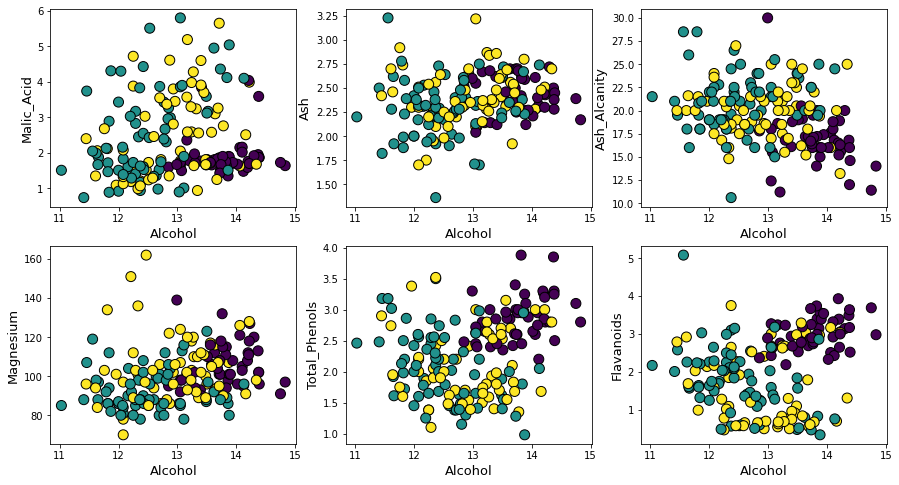

In [21]:
plt.figure(figsize=(15,8))
for i in range(1,7):
    plt.subplot(2,3,i)
    dim1=lst_vars[i-1][0]
    dim2=lst_vars[i-1][1]
    plt.scatter(df_[dim1],df_[dim2],c=df['clus_km'],edgecolor='k',s=100)
    plt.xlabel(f"{dim1}",fontsize=13)
    plt.ylabel(f"{dim2}",fontsize=13)

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create a range of cluster numbers to evaluate
cluster_range = range(2, 11)

# Initialize a list to store the silhouette scores
silhouette_scores = []

for k in cluster_range:
    # Create a KMeans instance with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit the model and compute the silhouette score
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

# Find the index of the maximum silhouette score
best_silhouette_index = np.argmax(silhouette_scores)

# Print the results
print("Silhouette Scores:", silhouette_scores)
print("Best Number of Clusters based on Silhouette Score:", cluster_range[best_silhouette_index])

Silhouette Scores: [0.5313385462455631, 0.46645538083563126, 0.4700629428759129, 0.38825534370343395, 0.3874239003184534, 0.37523337920608557, 0.3722906801538576, 0.37018036456273434, 0.3501404268703798]
Best Number of Clusters based on Silhouette Score: 2


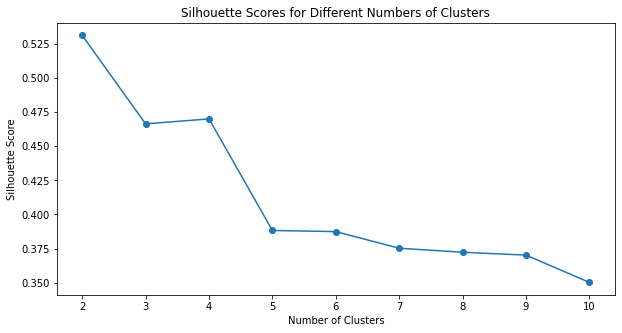

In [23]:
import matplotlib.pyplot as plt

# Plot silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()

Следует отметить, что силуэтный коэффициент имеет некоторые ограничения. Он может быть неинформативным, если данные имеют неоднородное распределение плотности или имеют различные формы кластеров. Поэтому его следует использовать в сочетании с другими методами оценки качества кластеризации.

Значение силуэтного коэффициента близкое к 1 указывает на хорошую кластеризацию, где объекты внутри кластера схожи между собой и хорошо отделены от объектов в других кластерах.

Значение силуэтного коэффициента близкое к 0 может указывать на перекрывающиеся кластеры или на трудности в разделении объектов на отдельные кластеры.

Значение силуэтного коэффициента близкое к -1 указывает на неправильную кластеризацию, где объекты внутри кластера не похожи друг на друга и имеют большую схожесть с объектами в других кластерах.

# Визуализация матрицы схожести

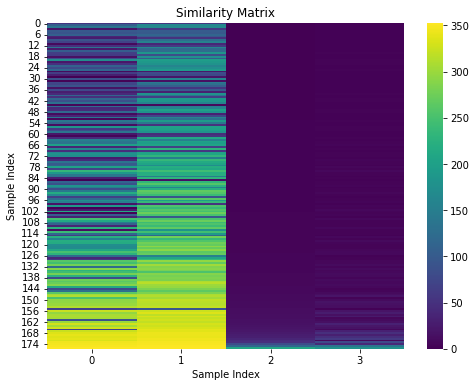

In [24]:
import seaborn as sns

# Compute the similarity matrix
similarity_matrix = linkage(X, method='ward', metric='euclidean')

# Plot the heatmap of the similarity matrix
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, cmap='viridis')
plt.title('Similarity Matrix')
plt.xlabel('Sample Index')
plt.ylabel('Sample Index')
plt.show()

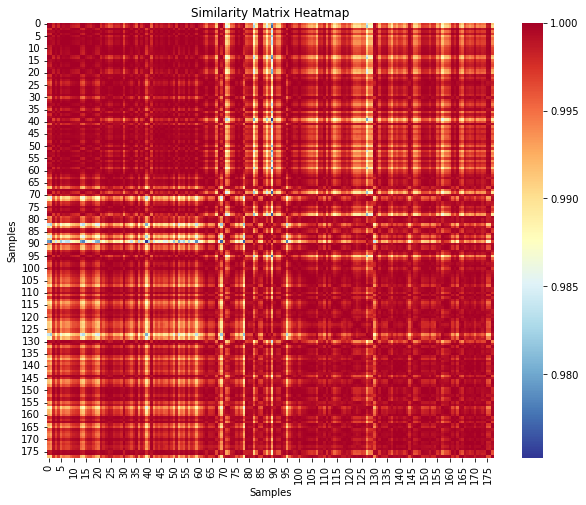

In [29]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

def calculate_similarity_matrix(data):
    # Calculate similarity matrix using cosine similarity
    similarity_matrix = cosine_similarity(data)

    return similarity_matrix

# Calculate similarity matrix
similarity_matrix = calculate_similarity_matrix(X)

# Plot similarity matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap='RdYlBu_r')
plt.title('Similarity Matrix Heatmap')
plt.xlabel('Samples')
plt.ylabel('Samples')
plt.show()

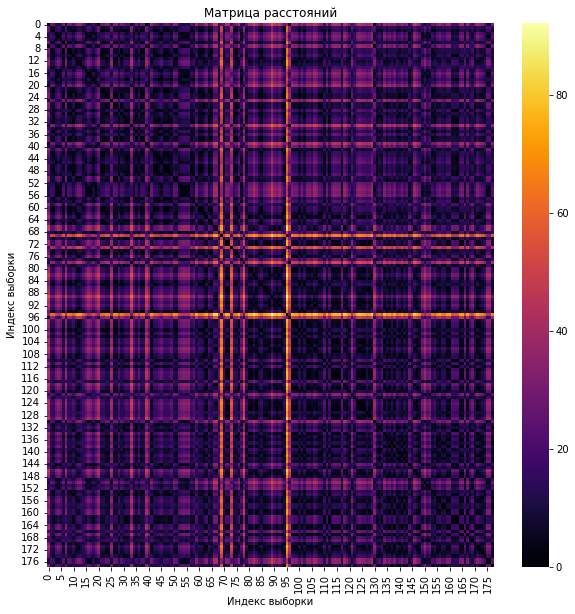

In [33]:
import seaborn as sns

d_mat = distance.cdist(X, X)

plt.figure(figsize=(10, 10))
sns.heatmap(d_mat, cmap='inferno')
plt.title('Матрица расстояний')
plt.xlabel('Индекс выборки')
plt.ylabel('Индекс выборки')
plt.show()

Внимательно изучив тепловую карту и основываясь на предыдущих методах можно сделать вывод,что оптимальное число кластеров, 3